# Vehículos Usados

## Aprendizaje de Máquinas I - 17CO2024

## Integrantes

- a1703 Iñaki Larrumbide (ilarrumbide10@gmail.com)
- a1708 Claudio Barril (claudiobarril@gmail.com)
- a1715 Christian Pisani Testa (christian.tpg@gmail.com)

## Fuente de información

https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho/data

Se obtuvieron 4 datasets con información de automóviles usados. En las primeras etapas de la investigación se abordará un análisis de los mismos para definir el o los datasets a utilizar.

## Objetivo de la investigación

Desarrollar un modelo predictivo que permita definir el precio apropiado de un automóvil dadas una serie de características del mismo.

Como primer paso, procedemos a importar algunas librerías que utilizaremos en el análisis de los datos, y a continuación, empezaremos a explorar los cuatro datasets con los que contamos.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Análisis de los datasets

Cargamos los cuatro datasets con los que contamos:

In [2]:
car_data = pd.read_csv('../datasets/car data.csv')
car_details = pd.read_csv('../datasets/CAR DETAILS FROM CAR DEKHO.csv')
car_details_v3 = pd.read_csv('../datasets/Car details v3.csv')
car_details_v4 = pd.read_csv('../datasets/Car details v4.csv')

Exploramos la cantidad de observaciones, features disponibles, duplicados, y algunos ejemplos de dichas observaciones:

In [3]:
shape = car_data.shape
print(f'[{shape[0]}]observaciones - [{shape[1]}]features')
duplicados = car_data.duplicated().sum()
print(f'Total de duplicadas: {duplicados}')
car_data.describe(include='all').T

[301]observaciones - [9]features
Total de duplicadas: 2


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Car_Name,301,98,city,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,301.0,NaN,NaN,NaN,2013.627907,2.891554,2003.0,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,NaN,NaN,NaN,4.661296,5.082812,0.1,0.9,3.6,6.0,35.0
Present_Price,301.0,NaN,NaN,NaN,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,NaN,NaN,NaN,36947.20598,38886.883882,500.0,15000.0,32000.0,48767.0,500000.0
Fuel_Type,301,3,Petrol,239,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Seller_Type,301,2,Dealer,195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,301,2,Manual,261,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner,301.0,NaN,NaN,NaN,0.043189,0.247915,0.0,0.0,0.0,0.0,3.0


In [4]:
car_data.sample(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
161,TVS Apache RTR 180,2014,0.45,0.826,23000,Petrol,Individual,Manual,0
247,verna,2015,5.95,9.400,36000,Petrol,Dealer,Manual,0
103,Bajaj Dominar 400,2017,1.45,1.600,1200,Petrol,Individual,Manual,0
256,city,2016,10.25,13.600,49562,Petrol,Dealer,Manual,0
188,Hero Glamour,2013,0.25,0.570,18000,Petrol,Individual,Manual,0


In [5]:
shape = car_details.shape
print(f'[{shape[0]}]observaciones - [{shape[1]}]features')
duplicados = car_details.duplicated().sum()
print(f'Total de duplicadas: {duplicados}')
car_details.describe(include='all').T

[4340]observaciones - [8]features
Total de duplicadas: 763


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
name,4340,1491,Maruti Swift Dzire VDI,69,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,4340.0,NaN,NaN,NaN,2013.090783,4.215344,1992.0,2011.0,2014.0,2016.0,2020.0
selling_price,4340.0,NaN,NaN,NaN,504127.311751,578548.736139,20000.0,208749.75,350000.0,600000.0,8900000.0
km_driven,4340.0,NaN,NaN,NaN,66215.777419,46644.102194,1.0,35000.0,60000.0,90000.0,806599.0
fuel,4340,5,Diesel,2153,NaN,NaN,NaN,NaN,NaN,NaN,NaN
seller_type,4340,3,Individual,3244,NaN,NaN,NaN,NaN,NaN,NaN,NaN
transmission,4340,2,Manual,3892,NaN,NaN,NaN,NaN,NaN,NaN,NaN
owner,4340,5,First Owner,2832,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
car_details.sample(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
3358,Mahindra XUV500 AT W10 1.99 mHawk,2017,1150000,65500,Diesel,Dealer,Automatic,First Owner
363,Ford Figo Diesel Celebration Edition,2013,150000,80000,Diesel,Individual,Manual,Second Owner
370,Mahindra XUV500 W8 2WD,2012,600000,200000,Diesel,Individual,Manual,First Owner
2284,Nissan Sunny Diesel XL,2012,300000,110000,Diesel,Individual,Manual,First Owner
124,Maruti Baleno Delta 1.2,2018,550000,20000,Petrol,Individual,Manual,First Owner


In [7]:
shape = car_details_v3.shape
print(f'[{shape[0]}]observaciones - [{shape[1]}]features')
duplicados = car_details_v3.duplicated().sum()
print(f'Total de duplicadas: {duplicados}')
car_details_v3.describe(include='all').T

[8128]observaciones - [13]features
Total de duplicadas: 1202


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
name,8128,2058,Maruti Swift Dzire VDI,129,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,8128.0,NaN,NaN,NaN,2013.804011,4.044249,1983.0,2011.0,2015.0,2017.0,2020.0
selling_price,8128.0,NaN,NaN,NaN,638271.807702,806253.403508,29999.0,254999.0,450000.0,675000.0,10000000.0
km_driven,8128.0,NaN,NaN,NaN,69819.510827,56550.554958,1.0,35000.0,60000.0,98000.0,2360457.0
fuel,8128,4,Diesel,4402,NaN,NaN,NaN,NaN,NaN,NaN,NaN
seller_type,8128,3,Individual,6766,NaN,NaN,NaN,NaN,NaN,NaN,NaN
transmission,8128,2,Manual,7078,NaN,NaN,NaN,NaN,NaN,NaN,NaN
owner,8128,5,First Owner,5289,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mileage,7907,393,18.9 kmpl,225,NaN,NaN,NaN,NaN,NaN,NaN,NaN
engine,7907,121,1248 CC,1017,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
car_details_v3

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [9]:
shape = car_details_v4.shape
print(f'[{shape[0]}]observaciones - [{shape[1]}]features')
duplicados = car_details_v4.duplicated().sum()
print(f'Total de duplicadas: {duplicados}')
car_details_v4.describe(include='all').T

[2059]observaciones - [20]features
Total de duplicadas: 0


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Make,2059,33,Maruti Suzuki,440,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Model,2059,1050,X1 sDrive20d xLine,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,2059.0,NaN,NaN,NaN,1702991.696455,2419880.635434,49000.0,484999.0,825000.0,1925000.0,35000000.0
Year,2059.0,NaN,NaN,NaN,2016.425449,3.363564,1988.0,2014.0,2017.0,2019.0,2022.0
Kilometer,2059.0,NaN,NaN,NaN,54224.714424,57361.721314,0.0,29000.0,50000.0,72000.0,2000000.0
Fuel Type,2059,9,Diesel,1049,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,2059,2,Manual,1133,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,2059,77,Mumbai,342,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Color,2059,17,White,802,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner,2059,6,First,1619,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
car_details_v4.sample(5)

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
573,BMW,3-Series 330i M Sport Edition,3650000,2019,6000,Petrol,Automatic,Delhi,White,First,Individual,1998 cc,248 bhp @ 5200 rpm,350 Nm @ 1450 rpm,RWD,4633.0,1811.0,1429.0,5.0,57.0
1484,Hyundai,Creta 1.6 SX,1044999,2016,78000,Diesel,Manual,Bangalore,Black,First,Individual,1582 cc,126 bhp @ 4000 rpm,265 Nm @ 1900 rpm,FWD,4270.0,1780.0,1630.0,5.0,60.0
82,Maruti Suzuki,Baleno Sigma 1.2,545000,2017,61518,Petrol,Manual,Noida,Red,First,Individual,1197 cc,83 bhp @ 6000 rpm,115 Nm @ 4000 rpm,FWD,3995.0,1745.0,1500.0,5.0,37.0
348,Audi,Q3 35 TDI Premium + Sunroof,1695000,2015,60000,Diesel,Automatic,Delhi,White,Second,Individual,1968 cc,174 bhp @ 4200 rpm,380 Nm @ 1750 rpm,AWD,4385.0,1831.0,1608.0,5.0,64.0
458,Mahindra,Scorpio S3 2WD 7 STR,1121000,2019,38000,Diesel,Manual,Patna,White,First,Individual,2523 cc,75 bhp @ 3200 rpm,200 Nm @ 1400 rpm,RWD,4456.0,1820.0,1930.0,7.0,60.0


Revisando la descripción de cada dataset, y algunos ejemplos, podemos construir el siguiente resumen de features disponibles en los distintos datasets y sus correspondencias en el resto:


| **Car data**      | **CAR DETAILS FROM CAR DEKHO** | **Car details v3** | **Car details v4** |
|-------------------|--------------------------------|--------------------|--------------------|
| 301 observaciones | 4340 observaciones             | 8128 observaciones | 2059 observaciones |
| Car_Name          | name                           | name               | Make + Model       |
| Year              | year                           | year               | Year               |
| Selling_Price     | selling_Price                  | selling_price      | Price              |
| Present Price     | -                              | -                  | -                  |
| Kms_Driven        | km_driven                      | km_driven          | Kilometer          |
| Fuel_Type         | fuel                           | fuel               | Fuel Type          |
| Seller_Type       | seller_type                    | seller_type        | Seller Type        |
| Transmission      | transmission                   | transmission       | Transmission       |
| Owner             | owner                          | owner              | Owner              |
| -                 | -                              | mileage            | -                  |
| -                 | -                              | engine             | Engine             |
| -                 | -                              | max_power          | Max Power          |
| -                 | -                              | torque             | Max Torque         |
| -                 | -                              | seats              | Seating Capacity   |
| -                 | -                              | -                  | Drivetrain         |
| -                 | -                              | -                  | Length             |
| -                 | -                              | -                  | Width              |
| -                 | -                              | -                  | Height             |
| -                 | -                              | -                  | Location           |
| -                 | -                              | -                  | Color              |
| -                 | -                              | -                  | Fuel Tank Capacity |

Observamos que el último dataset es el que cuenta con más features, no así con más observaciones.

Los primeros tres datasets tienen observaciones duplicadas, vamos a eliminarlas antes de continuar con algunos análisis de los datasets.

In [11]:
car_data = car_data.drop_duplicates()
car_details = car_details.drop_duplicates()
car_details_v3 = car_details_v3.drop_duplicates()
car_details_v4 = car_details_v4.drop_duplicates()

Veamos a continuación para qué años contamos con datos, y la dispersión de valores de los vehículos en los datasets:

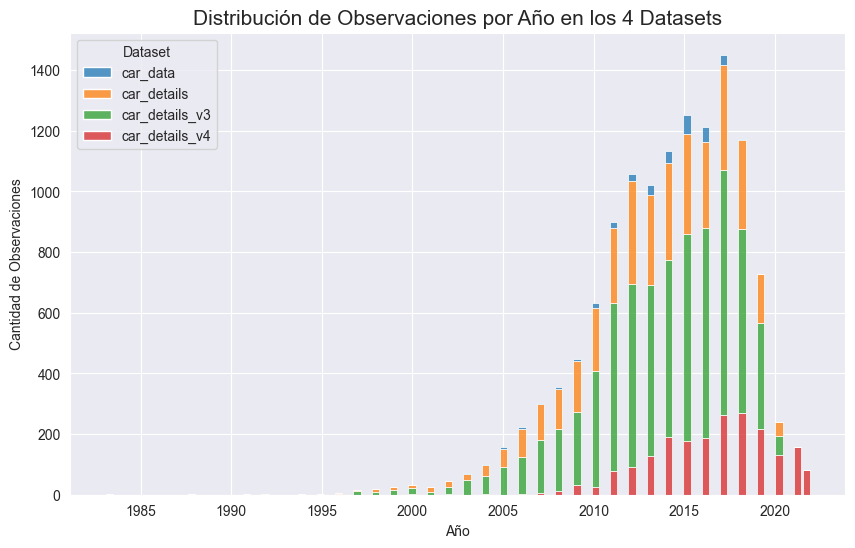

In [12]:
car_data['Dataset'] = 'car_data'
car_details['Dataset'] = 'car_details'
car_details_v3['Dataset'] = 'car_details_v3'
car_details_v4['Dataset'] = 'car_details_v4'

car_details['Year'] = car_details['year']
car_details_v3['Year'] = car_details_v3['year']

df_combined = pd.concat([car_data, car_details, car_details_v3, car_details_v4])

plt.figure(figsize=(10, 6))
sns.histplot(data=df_combined, x='Year', hue='Dataset', multiple='stack', shrink=.8)
plt.title('Distribución de Observaciones por Año en los 4 Datasets', fontsize=15)
plt.xlabel('Año')
plt.ylabel('Cantidad de Observaciones')
plt.show()

El dataset car_details_v3 no solo es el dataset que aporta mayor cantidad de observaciones sino también mayor amplitud en el rango de fechas. El dataset car_details aporta buena cantidad de observaciones, para un rango de fechas similar a car_details_v3, y car_details_v4 tiene pocas observaciones pero bastante actuales, lo cual agrega un diferencial a considerar.


Para la distribución de los precios, la haremos utilizando solo los datasets car_details, car_details_v3 y car_details_v4, dado que car_data está en otra escala y tiene un aporte marginal debido a las pocas observaciones:

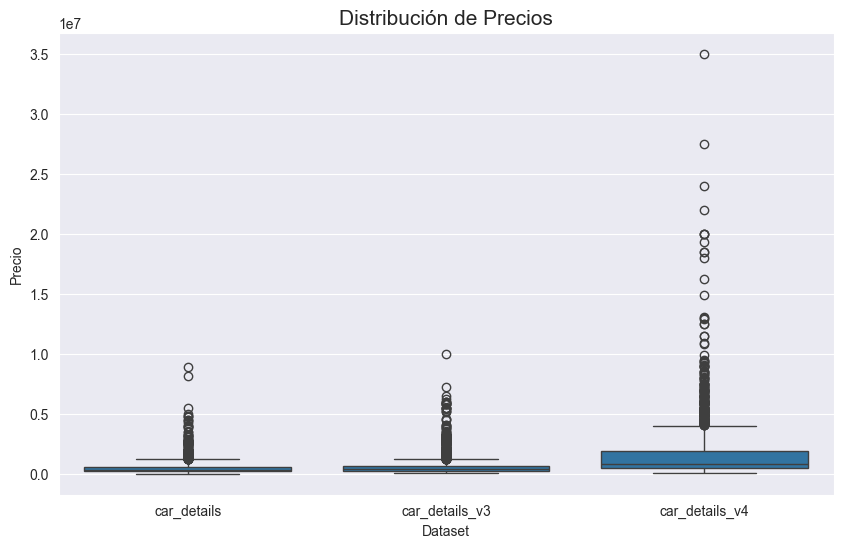

In [13]:
car_details['Price'] = car_details['selling_price']
car_details_v3['Price'] = car_details_v3['selling_price']

df_combined = pd.concat([car_details, car_details_v3, car_details_v4])

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_combined, x='Dataset', y='Price')
plt.title('Distribución de Precios', fontsize=15)
plt.xlabel('Dataset')
plt.ylabel('Precio')
plt.show()

Se puede notar como los datasets car_details y car_details_v3 mantienen un mismo rango de precios mientras que car_details_v4 tiene muchas observaciones con precios más elevados y heterogéneos.

A este punto del análisis, aunque aún superficial, decidimos empezar a trabajar con `Car details v3`. El motivo es que cuenta con la mayor cantidad de observaciones (6926 una vez eliminados los duplicados), y además suma 5 features con respecto a `car data` y `CAR DETAILS FROM CAR DEKHO`, que analizando el dominio, pueden resultar relevantes en el entrenamiento de un modelo que intente predecir el precio.

`Car details v4`, aunque con solo 2059 observaciones, cuenta con otras 7 features, algunas que pueden asumirse como interesantes para calcular el precio. Además, este dataset cuenta con valores de autos más actualizados que el dataset v3, por lo que podría suponerse que genere un mejor modelo para predecir el valor de autos de los últimos años. Eventualmente, vamos a intentar explorar un poco las posibilidades con este dataset también, aunque manteniendo mayor foco en el dataset v3.

## Car details v3 - Análisis del los datos y el dominio

In [14]:
car_details_v3.sample(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,Dataset,Year,Price
4718,Renault Triber RXZ,2019,786000,7720,Petrol,Individual,Manual,First Owner,20.0 kmpl,999 CC,71 bhp,96Nm@ 3500rpm,7.0,car_details_v3,2019,786000
1706,Mahindra XUV500 W6 2WD,2014,750000,80000,Diesel,Individual,Manual,Second Owner,15.1 kmpl,2179 CC,140 bhp,330Nm@ 1600-2800rpm,7.0,car_details_v3,2014,750000
3599,Datsun GO T Option,2020,450000,10000,Petrol,Individual,Manual,First Owner,19.02 kmpl,1198 CC,67.05 bhp,104Nm@ 4000rpm,5.0,car_details_v3,2020,450000
88,Hyundai i10 Era 1.1,2012,290000,28000,Petrol,Dealer,Manual,First Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0,car_details_v3,2012,290000
5425,Maruti Swift VDi BSIII W/ ABS,2010,270000,98000,Diesel,Individual,Manual,First Owner,17.8 kmpl,1248 CC,75 bhp,190Nm@ 2000rpm,5.0,car_details_v3,2010,270000


In [15]:
car_details_v3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6926 entries, 0 to 8125
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6926 non-null   object 
 1   year           6926 non-null   int64  
 2   selling_price  6926 non-null   int64  
 3   km_driven      6926 non-null   int64  
 4   fuel           6926 non-null   object 
 5   seller_type    6926 non-null   object 
 6   transmission   6926 non-null   object 
 7   owner          6926 non-null   object 
 8   mileage        6718 non-null   object 
 9   engine         6718 non-null   object 
 10  max_power      6721 non-null   object 
 11  torque         6717 non-null   object 
 12  seats          6718 non-null   float64
 13  Dataset        6926 non-null   object 
 14  Year           6926 non-null   int64  
 15  Price          6926 non-null   int64  
dtypes: float64(1), int64(5), object(10)
memory usage: 919.9+ KB


In [16]:
car_details_v3.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
name,6926,2058,Maruti Swift Dzire VDI,118,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,6926.0,NaN,NaN,NaN,2013.4203,4.078286,1983.0,2011.0,2014.0,2017.0,2020.0
selling_price,6926.0,NaN,NaN,NaN,517270.678458,519766.985985,29999.0,250000.0,400000.0,633500.0,10000000.0
km_driven,6926.0,NaN,NaN,NaN,73995.676437,58358.095175,1.0,40000.0,70000.0,100000.0,2360457.0
fuel,6926,4,Diesel,3755,NaN,NaN,NaN,NaN,NaN,NaN,NaN
seller_type,6926,3,Individual,6218,NaN,NaN,NaN,NaN,NaN,NaN,NaN
transmission,6926,2,Manual,6342,NaN,NaN,NaN,NaN,NaN,NaN,NaN
owner,6926,5,First Owner,4242,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mileage,6718,393,18.9 kmpl,210,NaN,NaN,NaN,NaN,NaN,NaN,NaN
engine,6718,121,1248 CC,907,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
print(f'Tipos de combustible: {car_details_v3['fuel'].unique()}')
print(f'Tipos de vendedor: {car_details_v3['seller_type'].unique()}')
print(f'Tipos de transmisión: {car_details_v3['transmission'].unique()}')
print(f'Tipos de dueño: {car_details_v3['owner'].unique()}')
print(f'Rango de años de los datos: desde {car_details_v3['year'].min()} hasta {car_details_v3['year'].max()}')

Tipos de combustible: ['Diesel' 'Petrol' 'LPG' 'CNG']
Tipos de vendedor: ['Individual' 'Dealer' 'Trustmark Dealer']
Tipos de transmisión: ['Manual' 'Automatic']
Tipos de dueño: ['First Owner' 'Second Owner' 'Third Owner' 'Fourth & Above Owner'
 'Test Drive Car']
Rango de años de los datos: desde 1983 hasta 2020


### Tipos de datos:

- **Variables categóricas**: `name`, `fuel`, `seller_type`, `transmission`, `owner`, `engine`, `max_power`, `torque`.
- **Variables de tipo fecha**: `year`.
- **Variables numéricas**: `km_driven`, `mileage`, `seats`.
- **Target numérico**: `selling_price`

### Análisis de los datos:

- `selling price` presenta números elevados de precio. Haciendo un poco de investigación, vemos en la fuente de datos que los mismos están expresados en la moneda de India, rupias indias. Este dato nos hace pensar que son ventas de vehículos en dicho país, lo que puede limitar la utilidad de predicción del modelo. Además, dado que no contamos con fecha de venta, asumiremos que los precios están todos ajustados, de tal forma de no asumir depreciación de la moneda a lo largo del tiempo. Según lo informado en la fuente de información, debería tomarse un cambio a 73 Rupias indias por Dólar estadounidense, si quisiese hacerse algún tipo de conversión.

<div style="text-align: center;">
  <img src="./images/dolar_rupia.png" alt="Dólar estadounidense a Rupia india" />
</div>

- `fuel` es el tipo de combustible que usa el vehículo, y tiene 4 valores posibles: `Diesel`, `Petrol`, `LPG` y `CNG` (Diesel, Gasolina, Gas Licuado de Petróleo y Gas Natural Comprimido).
- `seller_type` es el tipo de vendedor, y tiene 3 valores posibles: `Individual`, `Dealer` y `Trustmark Dealer` (particular, concesionario o bien concesionario "de confianza").
- `transmission` es el tipo de transmisión de la caja, y puede ser `Manual` o `Automatic`.
- `owner` tiene 5 valores posibles: `First Owner`, `Second Owner`, `Third Owner`, `Fourth & Above Owner` y `Test Drive Car`. Aunque es una variable categórica, podríamos definirle un orden lógico. Es de suponer que primer dueño es mejor que segundo, y así sucesivamente. Incluso podríamos animarnos a suponer que un auto utilizado para pruebas es "peor" que uno que tenga cuatro o más dueños, por estar expuesto al uso por parte de personas completamente inexpertas. 
- Contamos con observaciones desde el año `1983` al `2020`.
- `name`, `engine`, `max_power` y `torque` tienen alta cardinalidad (2058, 121, 322 y 441 posibles valores, respectivamente) pero veamos el significado de cada una:
  - `engine`: cilindrada del motor en centímetros cúbicos (cc), indica el volumen total de los cilindros del motor. Un mayor volumen generalmente sugiere mayor potencia, pero también puede impactar el consumo de combustible y las emisiones. Los compradores suelen considerar la cilindrada al evaluar el rendimiento del vehículo, ya que influye en la aceleración y la capacidad de carga. Puede ser tratada como variable numérica.
  - `mileage`: rendimiento del combustible, medido en kilómetros por litro o kg según el tipo de combustible (kmpl o km/kg), indica cuántos kilómetros puede recorrer el vehículo con un litro de combustible. Este es un indicador clave de eficiencia de combustible. Un mayor rendimiento de combustible puede ser deseable para los compradores, ya que reduce los costos operativos y el impacto ambiental. Puede ser tratada como variable numérica si hacemos una correcta conversión de las unidades.
  - `max_power`: potencia máxima del motor, medida en caballos de fuerza (bhp), representa la cantidad máxima de energía que el motor puede generar. Este valor se asocia comúnmente con el rendimiento del vehículo en términos de velocidad y aceleración. Los compradores pueden buscar vehículos con mayor potencia para una mejor experiencia de conducción, especialmente en situaciones que requieren aceleración rápida. Puede ser tratada como variable numérica
  - `torque`: fuerza de rotación que el motor puede generar. Este valor se relaciona con la capacidad de aceleración y la respuesta del vehículo. El torque se suele especificar con un rango de revoluciones por minuto (rpm), lo que indica a qué velocidades del motor se puede acceder a ese par máximo, aunque también se puede especificar un valor en lugar de un rango. El par máximo suele expresarse en alguna unidad de fuerza, con Newton-metros (nm) o kilogramo-metro (kgm). Un torque alto a bajas revoluciones es útil para la aceleración inicial y la capacidad de remolque. Suele estar relacionada con la máxima potencia. Luego veremos como trabajar con esta variable.

<div style="text-align: center;">
  <img src="./images/power_vs_torque.png" alt="Potencia vs Torque" />
</div>

Veamos distribución de las observaciones según las features categóricas de baja cardinalidad:

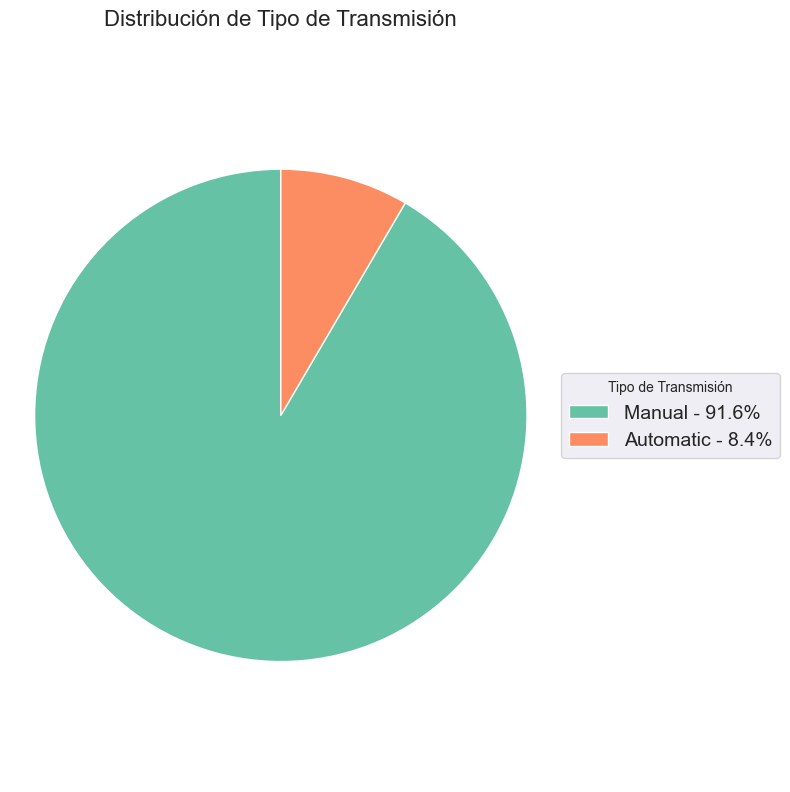

In [25]:
colors = sns.color_palette('Set2')

transmission_counts = car_details_v3['transmission'].value_counts()
transmission_percentages = transmission_counts / transmission_counts.sum() * 100
legend_labels = [f'{label} - {percentage:.1f}%' for label, percentage in zip(transmission_counts.index, transmission_percentages)]

fig, ax = plt.subplots(figsize=(8, 8))

wedges, texts = ax.pie(transmission_counts, startangle=90, colors=colors)
ax.legend(wedges, legend_labels, title="Tipo de Transmisión", loc="center left", bbox_to_anchor=(1, 0.5), fontsize=14)

plt.title('Distribución de Tipo de Transmisión', fontsize=16, y=1.02)
plt.axis('equal')
plt.tight_layout()

plt.show()

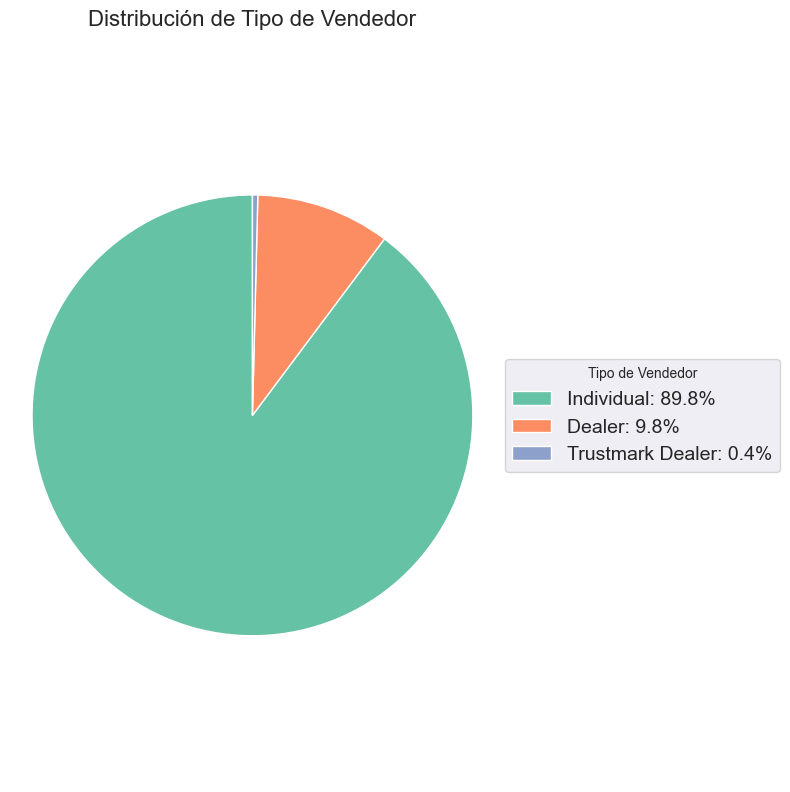

In [26]:
seller_type_counts = car_details_v3['seller_type'].value_counts()
seller_type_percentages = seller_type_counts / seller_type_counts.sum() * 100
legend_labels = [f'{label}: {percentage:.1f}%' for label, percentage in zip(seller_type_counts.index, seller_type_percentages)]

fig, ax = plt.subplots(figsize=(8, 8))

wedges, texts = ax.pie(seller_type_counts, startangle=90, colors=colors)
ax.legend(wedges, legend_labels, title="Tipo de Vendedor", loc="center left", bbox_to_anchor=(1, 0.5), fontsize=14)

plt.title('Distribución de Tipo de Vendedor', fontsize=16, y=1.02)
plt.axis('equal')
plt.tight_layout()

plt.show()

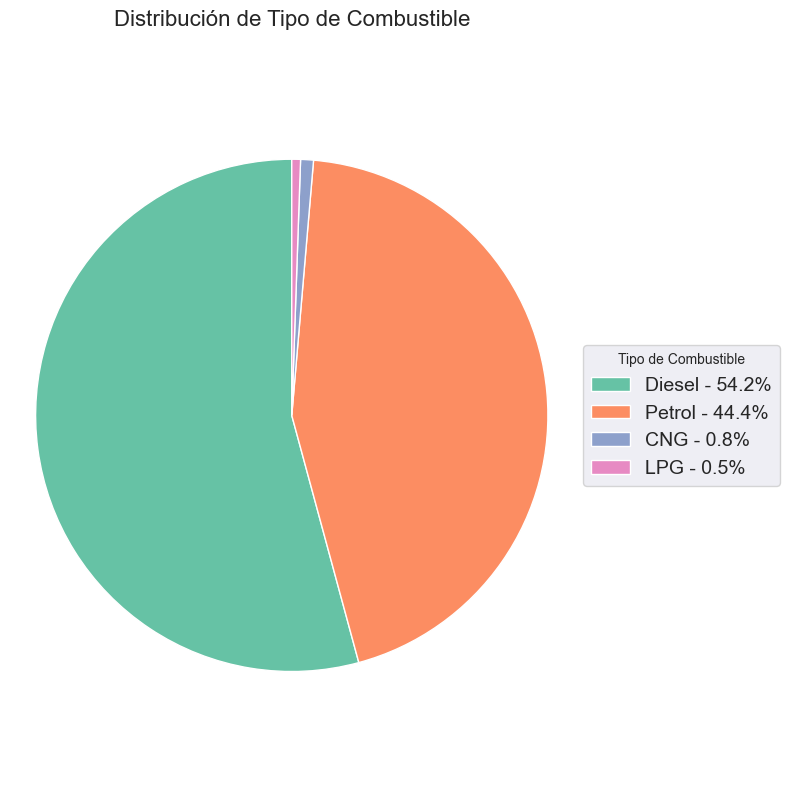

In [20]:
fuel_counts = car_details_v3['fuel'].value_counts()
fuel_percentages = fuel_counts / fuel_counts.sum() * 100
legend_labels = [f'{label} - {percentage:.1f}%' for label, percentage in zip(fuel_counts.index, fuel_percentages)]

fig, ax = plt.subplots(figsize=(8, 8))

wedges, texts = ax.pie(fuel_counts, startangle=90, colors=colors)
ax.legend(wedges, legend_labels, title="Tipo de Combustible", loc="center left", bbox_to_anchor=(1, 0.5), fontsize=14)

plt.title('Distribución de Tipo de Combustible', fontsize=16, y=1.02)
plt.axis('equal')
plt.tight_layout()

plt.show()

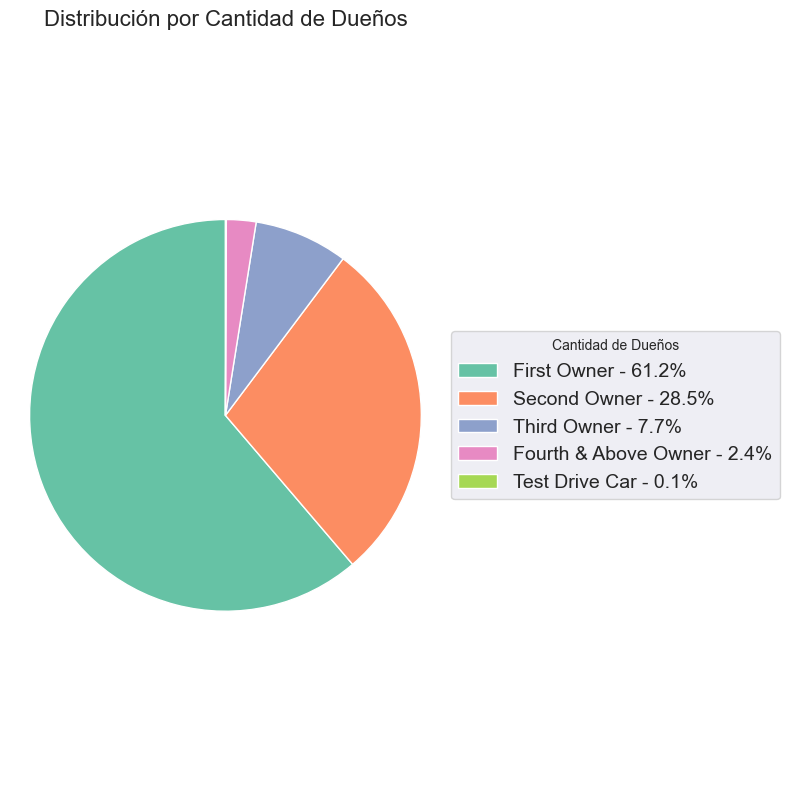

In [21]:
owner_counts = car_details_v3['owner'].value_counts()
owner_percentages = owner_counts / owner_counts.sum() * 100
legend_labels = [f'{label} - {percentage:.1f}%' for label, percentage in zip(owner_counts.index, owner_percentages)]

fig, ax = plt.subplots(figsize=(8, 8))

wedges, texts = ax.pie(owner_counts, startangle=90, colors=colors)
ax.legend(wedges, legend_labels, title="Cantidad de Dueños", loc="center left", bbox_to_anchor=(1, 0.5), fontsize=14)

plt.title('Distribución por Cantidad de Dueños', fontsize=16, y=1.02)
plt.axis('equal')
plt.tight_layout()

plt.show()

Finalmente, veamos mejor la distribución de precios para el dataset a trabajar:

In [22]:
# Contar nulos
nulls = car_details_v3['selling_price'].isnull().sum()

# Contar ceros
zeros = (car_details_v3['selling_price'] == 0).sum()

print(f"Número de valores nulos en 'selling_price': {nulls}")
print(f"Número de ceros en 'selling_price': {zeros}")

Número de valores nulos en 'selling_price': 0
Número de ceros en 'selling_price': 0


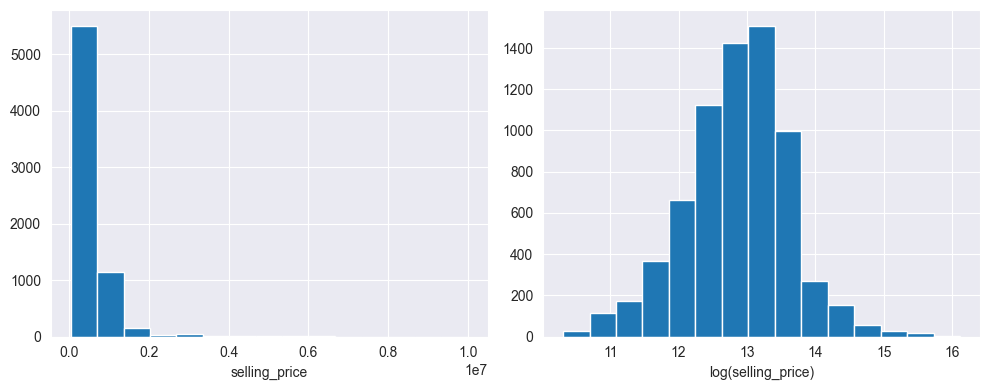

In [23]:
# Agrego feature con el logaritmo del selling_price
car_details_v3["selling_price_log"] = np.log(car_details_v3["selling_price"])

f, ax = plt.subplots(1,2, figsize=(10, 4))
car_details_v3["selling_price"].hist(ax=ax[0], bins=15)
car_details_v3["selling_price_log"].hist(ax=ax[1], bins=15)

ax[0].set_xlabel("selling_price")
ax[1].set_xlabel("log(selling_price)")
plt.tight_layout()

Podemos observar que con el logaritmo mejora la dispersión de los datos.

A este punto, podemos empezar formalmente con la ingeniería de features. A medida que avancemos con la misma, podremos explorar mejor otros datos, incluyendo graficar la matriz de correlación, para la que suponemos será interesante contar con las variables `engine`, `mileage`, `max_power` y `torque` expresadas en números.

In [27]:
# Contar valores nulos y ceros en la columna 'torque'
missing_torque = car_details_v3['torque'].isnull().sum()
zero_torque = (car_details_v3['torque'] == 0).sum()

# Total de valores en la columna
total_values = car_details_v3['torque'].shape[0]

print(f"Número de valores faltantes (missing) en 'torque': {missing_torque}")
print(f"Número de ceros en 'torque': {zero_torque}")
print(f"Total de valores en 'torque': {total_values}")
print(f"Porcentaje de valores faltantes: {missing_torque / total_values * 100:.2f}%")

Número de valores faltantes (missing) en 'torque': 209
Número de ceros en 'torque': 0
Total de valores en 'torque': 6926
Porcentaje de valores faltantes: 3.02%
